# Understanding Child Mortality
## Studying Outliers


#### Project Proposal for cs169
#### by Ruchir Patel

GitLab on CS server: https://gitlab.cs.dartmouth.edu/ruchir/international-aid-and-health

### Hypothesis

1. Countries that receive more aid, must do better at Child Mortality rate.
2. Urbanization, Women Employment, GDP and Child Mortality must be inversely correlated
3. Adolescence fertility and Child Mortality must be correlated

### Goals

Goal 1. Visualize Aid, Visualize Child Mortality rates by Country


Goal 2. Study the outliers


Goal 3. Understanding factors of Child Mortalirty rate

### Datasets

1. World Bank official Aid Received: http://data.un.org/Data.aspx?q=Official+Development+Assistance&d=WDI&f=Indicator_Code%3aDT.ODA.ALLD.CD
2. Child Mortality Rate Dataset: https://ourworldindata.org/child-mortality
3. World Bank Economic Data: http://databank.worldbank.org/data/reports.aspx?source=jobs#

### Questions

1. Which countries are outliers when it comes to Child Mortality?
i.e. which coutnries that are suppose to do good aren't doing as well (US, India), and which countries despite being tiny countries with history of war are doing pretty well.
2. Why is Sri Lanka doing so good? Is there data significantly different from other countries?
3. Study United States, India, Rwanda

### Lessons Learned

Pros

1. High level perspective
2. Shows where a government’s priorities are
3. Which countries are serious about healthcare
4. GDP is NOT an excuse

Cons

1. Data -> Analysis -> Results -> Actions?
2. Impact?


### Future Steps

#### qualitative

Do qualitative analysis of outliers, geo-political and economical

Understand why outliers exist in the first place?

#### Quantitative

Detailed data about Child Mortality. Study the Causes, why are these kids dying.


Bridge the gap between
Data / Analysis / Results -> Actionable Items


Would like to look at GDP per capita by Purchasing Power Parity, rather than over GDP in percentage.

### Conclusion

I am shocked by some of the results I got.

1. GDP of a (most) country is not statistically significantly correlated to Child Mortality rates.
2. In Sri Lanka, which is doing a fantastic job at keeping childing mortality rate low, Urban Population is directly correlated with Child mortality rates. i.e. child mortality rate icnreases as more people move to urban areas.



Finland     3
US         44
Sri Lanka     61
Rwanda     133
India         135

Total        188



## References

[1] https://en.wikipedia.org/wiki/Multidimensional_scaling

[2] http://www.who.int/news-room/fact-sheets/detail/children-reducing-mortality

[3] https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.pearsonr.html

[4] http://www.projecthope.org/assets/documents/Child-Mortality-in-the-US-and-19-OECD.pdf

[5] https://www.indexmundi.com/facts/indicators/SH.DYN.MORT/rankings

[6] https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

[7] http://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html

### Base Code from

MDS: http://scikit-learn.org/stable/auto_examples/manifold/plot_mds.html

Plot: https://pythonspot.com/matplotlib-bar-chart/

Graph: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html


### Related work

1. Official Stastical Report: http://www.oecd.org/dac/financing-sustainable-development/development-finance-data/ODA-2016-detailed-summary.pdf

2. http://aiddata.org/publications/apples-and-dragon-fruits-the-determinants-of-aid-and-other-forms-of-state-financing-from-china-to-africa-2

Non Western Countries have wide veriety of economic activities, and above paper looks into China's Official Development Assistence, and more commercially oriented sources of financing like debt financing for infrastructure and commerce. I would like to do similar analysis for India and Aid data. 

### Webpage 

https://ruchir594.github.io/cs169/

# Part 1: Visualization using Multidimensional Scaling 

139
(139, 4)
(139, 4)
(139, 2)


/Users/ruchir/p1/lib/python2.7/site-packages/ipykernel_launcher.py:166: RuntimeWarning: divide by zero encountered in divide


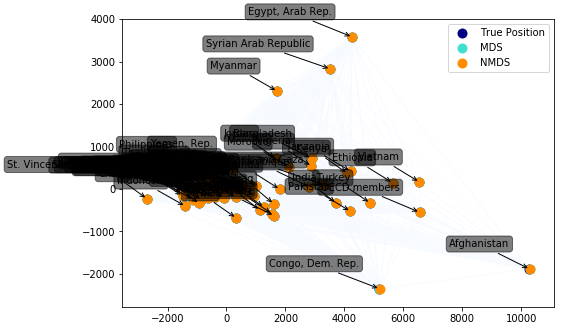

20
(19, 4)
(19, 4)
(19, 2)


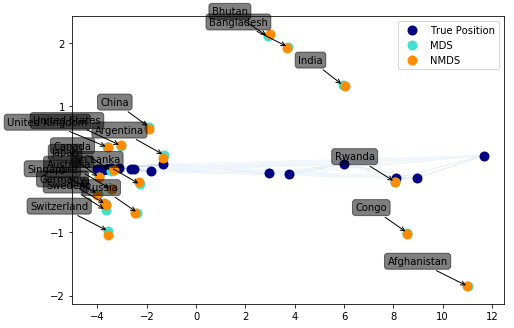

In [19]:
# ------------------------------
# ---
# ---
# * Maybe be run this twice to see the plotted graph, for some reason, it shows up if you run again. 
# Reference/Base Code from: http://scikit-learn.org/stable/auto_examples/manifold/plot_mds.html

def mds(filename, filt, ignore, flag='Aid'):
    # filename: text , full path of file 
    # filt: list[str] , list of string, if non empty, only countries specified in list will be used
    # ignore: list[str] , list of string, if non empty, countries in list will be ignored
    # flag: str , default 'Aid', specifying use schema for Aid while opening CSV
    
    # return: None
    
    # just plot graph
    
    import numpy as np
    #import pandas as pd

    from matplotlib import pyplot as plt
    from matplotlib.collections import LineCollection

    from sklearn import manifold
    from sklearn.metrics import euclidean_distances
    from sklearn.decomposition import PCA

    n_samples = 20

    import csv
    with open(filename, 'rb') as f:
        sr = csv.reader(f, delimiter=',')
        data = []
        for e in sr:
            data.append(e)

    # data is data of all countries
    
    countries = []
    data3years = []
    for e in data:
        if len(e) < 3:
            temp = True # Do nothing
            #print e
        if filt != []:
            if len(e)>=4 and e[2] == '2014' and e[0] in filt:
                data3years.append([float(e[3])])
                countries.append(e[0])
        else:
            if len(e)>=3 and e[1] == '2014' and e[0] not in ignore:
                data3years.append([float(e[2])/1000000])
                countries.append(e[0])
                
    n_samples = len(countries)
    
    # The CSV file of child data has different scheme than Aid data
    # hence the data retrival part depends on filename as different column
    # needs to be extracted 
    if flag == 'Child':
        countries.append('placeholder')
        i=0
        for e in data:
            if len(e) >=3 and e[2] == '2013' and countries[i] == e[0]:
                data3years[i].append(float(e[3]))
                i+=1
        i=0
        for e in data:
            if len(e) >=3 and e[2] == '2012' and countries[i] == e[0]:
                data3years[i].append(float(e[3]))
                i+=1

        i=0
        for e in data:
            if len(e) >=3 and e[2] == '2011' and countries[i] == e[0]:
                data3years[i].append(float(e[3]))
                i+=1
    else:
        i=0
        for e in data:
            if len(e) >=3 and e[1] == '2013' and countries[i] == e[0]:
                data3years[i].append(float(e[2])/1000000)
                i+=1
        i=0
        for e in data:
            if len(e) >=3 and e[1] == '2012' and countries[i] == e[0]:
                data3years[i].append(float(e[2])/1000000)
                i+=1

        i=0
        for e in data:
            if len(e) >=3 and e[1] == '2011' and countries[i] == e[0]:
                data3years[i].append(float(e[2])/1000000)
                i+=1
    data3years = np.array(data3years)

    # At this point, data3years has all the data we need to do multidimensional scaling 
    # data3years has data of more than 3 years, the name is just for historical reasons
    
    print len(countries)
    print data3years.shape
    #countries = [chr(ord('A')+i) for i in range(20)]

    # We will be reducing 
    # no_of_countries X no_of_years
    # to 
    # no_of_countries X 2

    import sys
    #sys.exit()

    seed = np.random.RandomState(seed=3)
    X_true = seed.randint(0, 20, 4 * n_samples).astype(np.float)
    X_true = X_true.reshape((n_samples, 4))
    X_true = data3years
    
    print X_true.shape#, X_true
    # Center the data
    X_true -= X_true.mean()

    similarities = euclidean_distances(X_true)

    # Add noise to the similarities
    noise = np.random.rand(n_samples, n_samples)
    noise = noise + noise.T
    noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0
    similarities += noise

    mds = manifold.MDS(n_components=4, max_iter=3000, eps=1e-9, random_state=seed,
                       dissimilarity="precomputed", n_jobs=1)
    pos = mds.fit(similarities).embedding_

    nmds = manifold.MDS(n_components=4, metric=False, max_iter=3000, eps=1e-12,
                        dissimilarity="precomputed", random_state=seed, n_jobs=1,
                        n_init=1)
    npos = nmds.fit_transform(similarities, init=pos)

    # Rescale the data
    pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
    npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

    # Rotate the data
    clf = PCA(n_components=2)
    X_true = clf.fit_transform(X_true)
    print X_true.shape
    pos = clf.fit_transform(pos)

    npos = clf.fit_transform(npos)

    fig = plt.figure(1)
    ax = plt.axes([0., 0., 1., 1.])

    s = 100
    plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0,
                label='True Position')
    plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
    plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')
    plt.legend(scatterpoints=1, loc='best', shadow=False)

    for label, x, y in zip(countries, pos[:, 0], pos[:, 1]):
        plt.annotate(
            label,
            xy=(x, y), xytext=(-20, 20),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.3', fc='black', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

    similarities = similarities.max() / similarities * 100
    similarities[np.isinf(similarities)] = 0

    # Plot the edges
    start_idx, end_idx = np.where(pos)
    # a sequence of (*line0*, *line1*, *line2*), where::
    #            linen = (x0, y0), (x1, y1), ... (xm, ym)
    segments = [[X_true[i, :], X_true[j, :]]
                for i in range(len(pos)) for j in range(len(pos))]
    values = np.abs(similarities)
    lc = LineCollection(segments,
                        zorder=0, cmap=plt.cm.Blues,
                        norm=plt.Normalize(0, values.max()))
    lc.set_array(similarities.flatten())
    lc.set_linewidths(0.5 * np.ones(len(segments)))
    ax.add_collection(lc)

    plt.show()
    
# ----
# Plotting Aid data of every single country -> ignoring some aggregated rows : Specified by "ignore" param
# ----

mds(filename = 'data/UNdata_aid_received.csv', filt = [], ignore = ["Euro area", "European Union", "North America", "Low & middle income",
    "Arab World", "East Asia & Pacific (all income levels)", "East Asia & Pacific (developing only)",
    "Europe & Central Asia (all income levels)",
    "Europe & Central Asia (developing only)", "High income", "Latin America & Caribbean (all income levels)",
    "Latin America & Caribbean (developing only)", "world", "Middle income", "Low income", "Lower middle income",
    "Middle East & North Africa (all income levels)", "Middle East & North Africa (developing only)",
    "Sub-Saharan Africa (all income levels)", "Sub-Saharan Africa (developing only)",
    "Upper middle income", "World", "Heavily indebted poor countries (HIPC)", "South Asia",
    "Least developed countries: UN classification"])

# ----
# Plotting on some of the countries -> ignoring every other rows : specified by "filter" param, specifying flag
# ----

mds(filename = 'data/child-mortality.csv', filt = ['Afghanistan', 'Argentina', 'Australia', 'Bangladesh', 'Bhutan', 'Canada',
        'China', 'Congo', 'Germany', 'India', 'Japan', 'Russia', 'Rwanda','Singapore', 'Sri Lanka', 'Sweden',
        'Switzerland', 'United Kingdom', 'United States'], ignore = [], flag='Child')

# Part 2: Studying Outliers by Using World Bank Data and Child Mortality Data


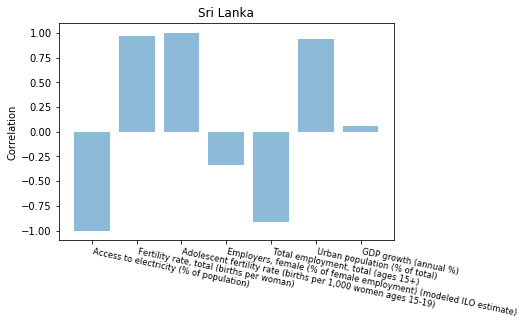

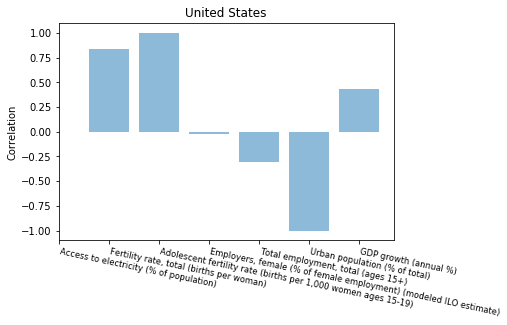

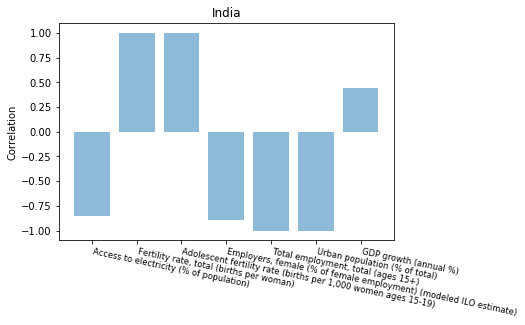

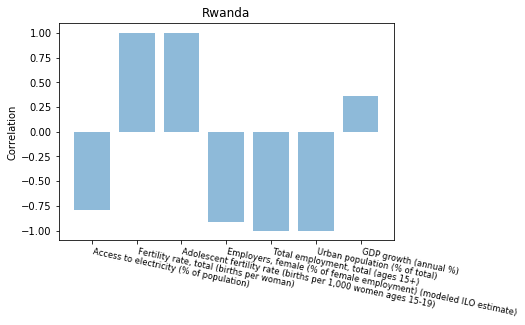

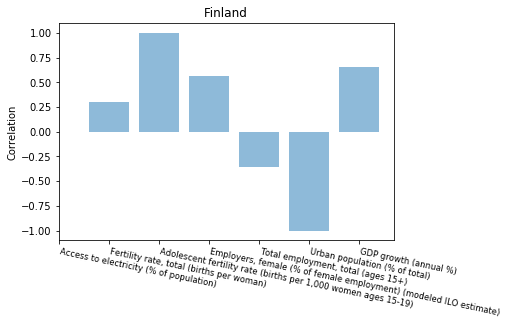

In [17]:

# ---
# ---
# ---



countries = ['Sri Lanka', 'United States', 'India', 'Rwanda', 'Finland']
for country in countries:
# data is data of all countries
#country = 'Finland'
    import numpy as np
    #import pandas as pd

    import csv
    with open('data/child-mortality.csv', 'rb') as f:
        sr = csv.reader(f, delimiter=',')
        data = []
        for e in sr:
            data.append(e)
    mort = []

    years = [2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004]
    years = years[::-1]
    for i in range(len(data)):
        if len(data[i]) >=3 and country == data[i][0] and data[i][2] == str(years[0]):
            for j in range(len(years)):
                mort.append(float(data[i+j][3]))
            break

    mort = np.array(mort)


    with open('data/World_Bank_Data.csv', 'rb') as f:
        sr = csv.reader(f, delimiter=',')
        data = []
        for e in sr:
            data.append(e)
            break
        for e in sr:
            if e[0] == country:
                data.append(e)

    # index 1 is access to electricity !!!
    feature_index = [1, 42, 2, 26, 146, 160, 47]
    feature_vector = []
    feature_name = []
    for index in feature_index:
        feature_vector.append([])
        feature_name.append(data[index][2])
        for year in years:
            j = year-1990+4
            feature_vector[-1].append(float(data[index][j]))

    from scipy.stats.stats import spearmanr

    cors = []
    for i in range(len(feature_vector)):
        cors.append(spearmanr(mort, feature_vector[i])[0])

    import matplotlib.pyplot as plt
    plt.bar(np.arange(len(cors)), cors, align='center', alpha=0.5)
    plt.xticks(np.arange(len(cors)), feature_name, rotation=-12, size='small', horizontalalignment='left')
    plt.ylabel('Correlation')
    plt.title(country)
    plt.show()